<a href="https://colab.research.google.com/github/sauravnaldas/ANZ-Bank-Transaction-Monitoring-Analysis-by-R/blob/main/ANZ_Bank_Transaction_Monitoring_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANZ Bank transaction Monitoring Analysis**

This is a “synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions. The dataset is designed to understand the transaction pattern that are observed in ANZ’s real transaction data.” The data set contains 12,043 observations with 23 variables.

**Agenda** :
Explotary Data Analysis: Draw insights from the data about customers purchase behaviour,transactions pattern and expenditure behaviour in age category. Top 10 bank customers by annual income and annual income by Gender.

In [3]:
path="/anz.csv"
anz=read.csv(path)


Preparing libraries for the analysis

In [13]:
library(dplyr)
library(stringr)
library(lubridate)
library(tidyverse)
library(rpart)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ readr   2.1.2
✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



Summary of the dataset:

In [5]:
head(anz)
str(anz)
summary(anz)
colnames(anz)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,⋯,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,authorized,1,,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,⋯,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2,authorized,0,,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,⋯,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
3,authorized,1,,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,⋯,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
4,authorized,1,,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,⋯,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
5,authorized,1,,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,⋯,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
6,posted,NA,,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,,NA,Robert,⋯,20,,,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,,debit


'data.frame':	12043 obs. of  23 variables:
 $ status           : chr  "authorized" "authorized" "authorized" "authorized" ...
 $ card_present_flag: int  1 0 1 1 1 NA 1 1 1 NA ...
 $ bpay_biller_code : chr  "" "" "" "" ...
 $ account          : chr  "ACC-1598451071" "ACC-1598451071" "ACC-1222300524" "ACC-1037050564" ...
 $ currency         : chr  "AUD" "AUD" "AUD" "AUD" ...
 $ long_lat         : chr  "153.41 -27.95" "153.41 -27.95" "151.23 -33.94" "153.10 -27.66" ...
 $ txn_description  : chr  "POS" "SALES-POS" "POS" "SALES-POS" ...
 $ merchant_id      : chr  "81c48296-73be-44a7-befa-d053f48ce7cd" "830a451c-316e-4a6a-bf25-e37caedca49e" "835c231d-8cdf-4e96-859d-e9d571760cf0" "48514682-c78a-4a88-b0da-2d6302e64673" ...
 $ merchant_code    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ first_name       : chr  "Diana" "Diana" "Michael" "Rhonda" ...
 $ balance          : num  35.39 21.2 5.71 2117.22 17.95 ...
 $ date             : chr  "8/1/2018" "8/1/2018" "8/1/2018" "8/1/2018" ...
 $ gender   

    status          card_present_flag bpay_biller_code     account         
 Length:12043       Min.   :0.000     Length:12043       Length:12043      
 Class :character   1st Qu.:1.000     Class :character   Class :character  
 Mode  :character   Median :1.000     Mode  :character   Mode  :character  
                    Mean   :0.803                                          
                    3rd Qu.:1.000                                          
                    Max.   :1.000                                          
                    NA's   :4326                                           
   currency           long_lat         txn_description    merchant_id       
 Length:12043       Length:12043       Length:12043       Length:12043      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
       

[1] "status"            "card_present_flag" "bpay_biller_code" 
 [4] "account"           "currency"          "long_lat"         
 [7] "txn_description"   "merchant_id"       "merchant_code"    
[10] "first_name"        "balance"           "date"             
[13] "gender"            "age"               "merchant_suburb"  
[16] "merchant_state"    "extraction"        "amount"           
[19] "transaction_id"    "country"           "customer_id"      
[22] "merchant_long_lat" "movement"

Finding the NA values

In [6]:
sapply(anz, function(x) sum(is.na(x)))

status card_present_flag  bpay_biller_code           account 
                0              4326                 0                 0 
         currency          long_lat   txn_description       merchant_id 
                0                 0                 0                 0 
    merchant_code        first_name           balance              date 
            11160                 0                 0                 0 
           gender               age   merchant_suburb    merchant_state 
                0                 0                 0                 0 
       extraction            amount    transaction_id           country 
                0                 0                 0                 0 
      customer_id merchant_long_lat          movement 
                0                 0                 0

% of NA values in the whole dataset

In [7]:
colSums(is.na(anz))/nrow(anz)

status card_present_flag  bpay_biller_code           account 
        0.0000000         0.3592128         0.0000000         0.0000000 
         currency          long_lat   txn_description       merchant_id 
        0.0000000         0.0000000         0.0000000         0.0000000 
    merchant_code        first_name           balance              date 
        0.9266794         0.0000000         0.0000000         0.0000000 
           gender               age   merchant_suburb    merchant_state 
        0.0000000         0.0000000         0.0000000         0.0000000 
       extraction            amount    transaction_id           country 
        0.0000000         0.0000000         0.0000000         0.0000000 
      customer_id merchant_long_lat          movement 
        0.0000000         0.0000000         0.0000000

*bpay_biller_code and merchant code has 90% NA values. For better analysis either dropping them or ignoring them is best to do*

In [8]:
anz$bpay_biller_code=NULL
anz$merchant_code=NULL

In [9]:
sapply(anz, function(x) sum(is.na(x)))

status card_present_flag           account          currency 
                0              4326                 0                 0 
         long_lat   txn_description       merchant_id        first_name 
                0                 0                 0                 0 
          balance              date            gender               age 
                0                 0                 0                 0 
  merchant_suburb    merchant_state        extraction            amount 
                0                 0                 0                 0 
   transaction_id           country       customer_id merchant_long_lat 
                0                 0                 0                 0 
         movement 
                0

***Exploratory data analysis :***



***changing date column's format***

In [10]:
anz$date=as.Date(anz$date,format = "%m/%d/%Y")

***Visualizing the data insights***

# A tibble: 2 × 2
  gender count
  <chr>  <int>
1 F       5758
2 M       6285


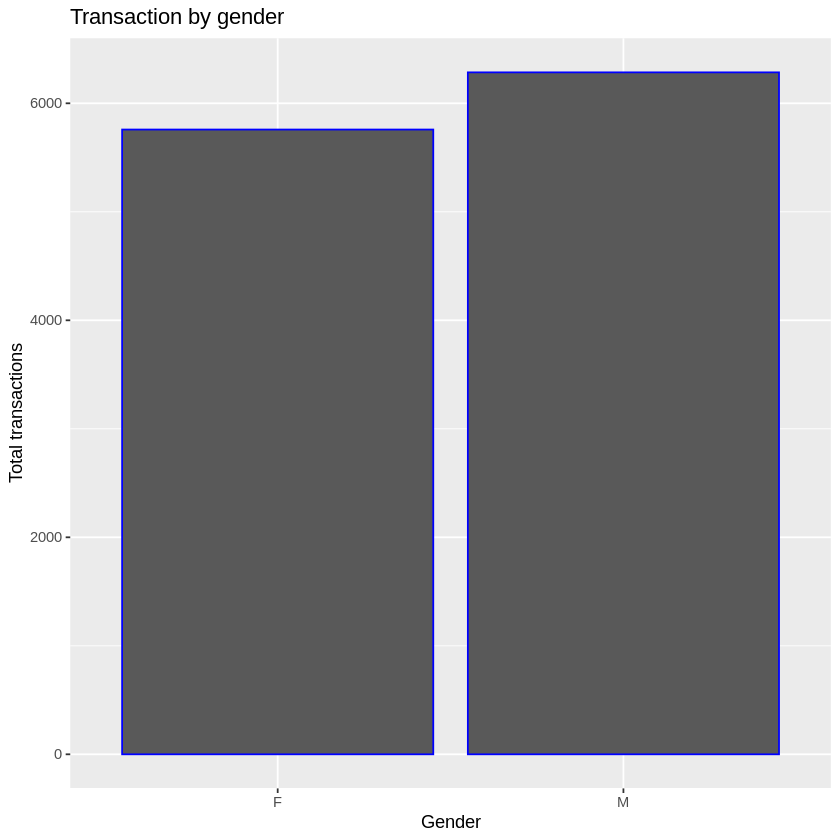

In [33]:
gender_count=anz %>%
  group_by(gender) %>%
  summarise(count=n()) 
  print(gender_count)
ggplot(gender_count,aes(x=gender,y=count))+geom_col(col='blue')+labs(title = "Transaction by gender",x="Gender",y="Total transactions")

Males have made 6285 transactions where females have made 5758 transactions.

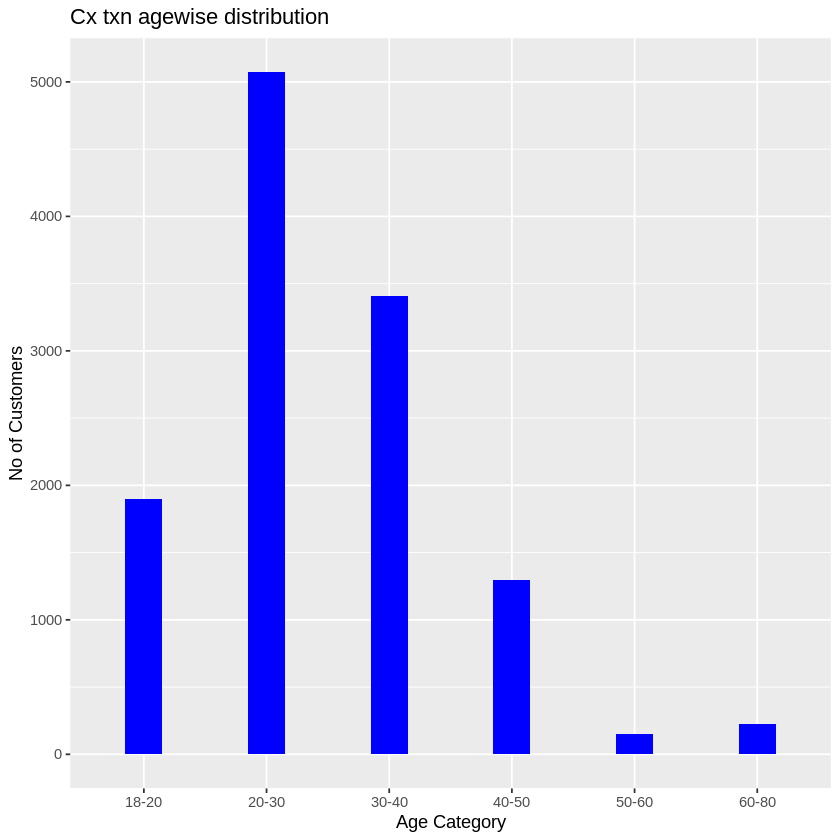

In [17]:
age_wise_txn= anz %>%
  mutate(age_category=case_when(18<=age & age<=20~'18-20', 
                   20<age & age<=30~'20-30',
                   30<age & age<=40~'30-40',
                   40<age & age<=50~'40-50',
                   50<age & age<=60~'50-60',
                   TRUE~'60-80')) %>%
group_by(age_category) %>%
summarise(count=n())
ggplot(age_wise_txn,aes(x=age_category,y=count))+geom_bar(fill="blue",width=0.3,stat="identity")+ggtitle("Cx txn agewise distribution") + 
  ylab("No of Customers") + xlab("Age Category")

Maximum of customers were between 20-30. Also it can be concluded that retired person have and person nearing the age of retirement are doing less transaction.

In [18]:
table(anz$txn_description)


INTER BANK PAY/SALARY    PAYMENT PHONE BANK        POS  SALES-POS 
       742        883       2600        101       3783       3934 

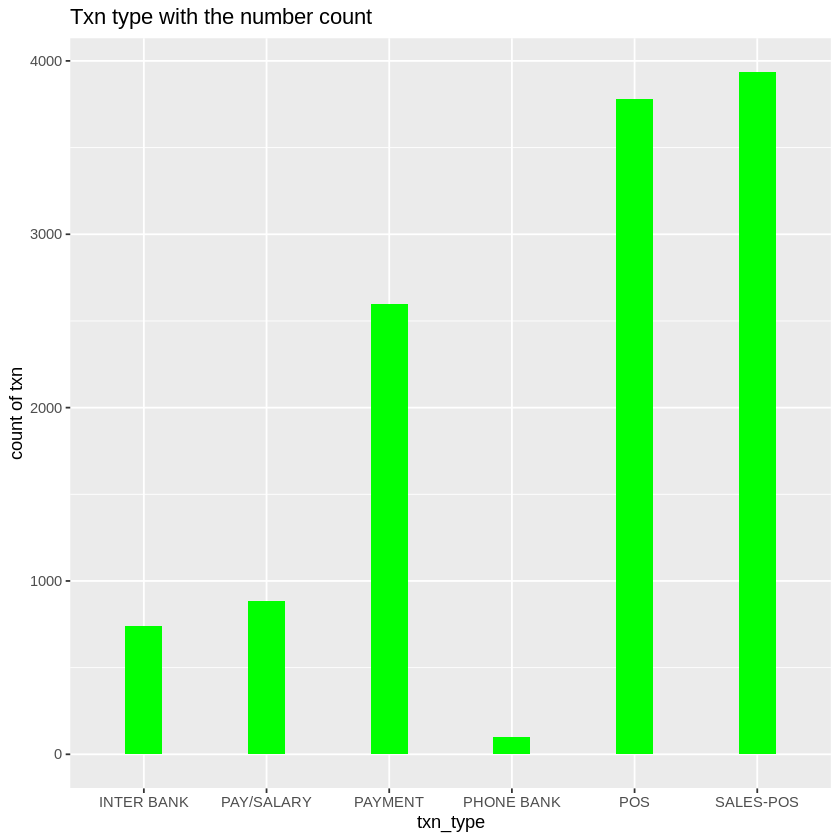

In [19]:
type_of_txn= anz %>%
  group_by(txn_description) %>%
  summarise(no_of_txn=n())

ggplot(type_of_txn,aes(x=txn_description,y=no_of_txn))+geom_bar(fill="green",width=0.3,stat="identity")+ggtitle("Txn type with the number count") + 
  ylab("count of txn") + xlab("txn_type")

Most of the transactions were Sales and in POS category. Very small transactions were made through phone. 883 transactions were made in PAY/SALARY, we can assume these were salary credited in customers account.

# A tibble: 2 × 2
  movement count
  <chr>    <int>
1 credit     883
2 debit    11160


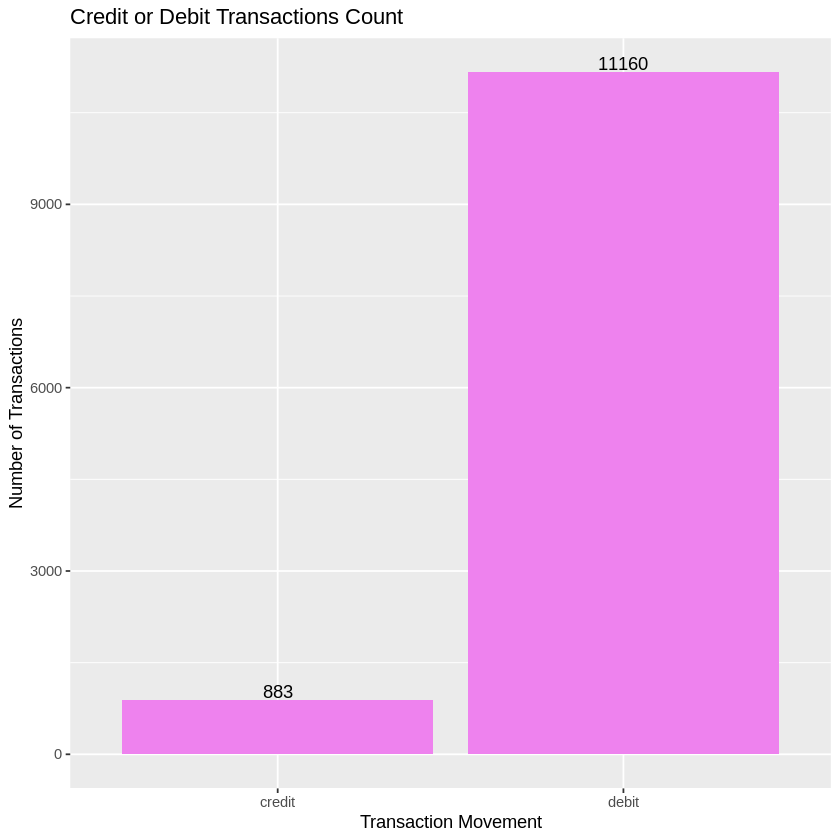

In [20]:
txn_movement=anz %>% group_by(movement)%>% summarise(count=n())
print(txn_movement)
ggplot(txn_movement,aes(x=movement,y=count))+geom_col(fill="violet")+geom_text(aes(label=count),vjust=-0.2)+labs(title="Credit or Debit Transactions Count",x="Transaction Movement",y="Number of Transactions")


Debit transactions were 11160, and Credit transactions were 883 which can be salary credited to their account.

# A tibble: 6 × 2
  txn_description avg_txn
  <chr>             <dbl>
1 INTER BANK         86.7
2 PAY/SALARY       1899. 
3 PAYMENT            77.6
4 PHONE BANK        106. 
5 POS                40.4
6 SALES-POS          39.9


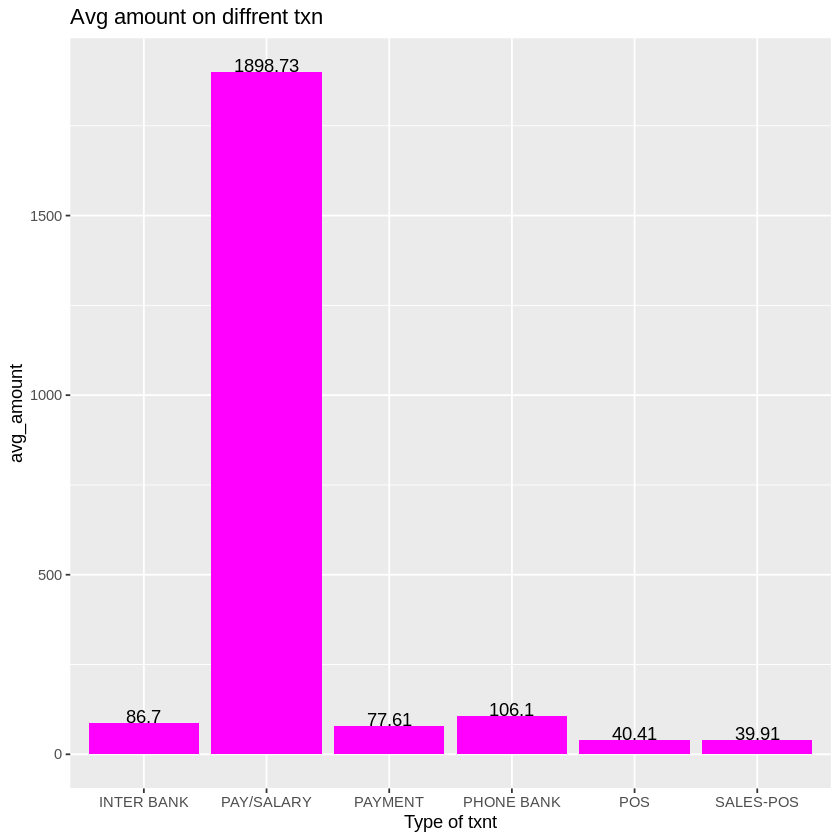

In [22]:
txn_dist_amount=anz %>%
  group_by(txn_description) %>%
  summarise(avg_txn=round(mean(amount),2))
print(txn_dist_amount)
ggplot(txn_dist_amount,aes(x=txn_description,y=avg_txn))+geom_col(fill="magenta")+geom_text(aes(label=avg_txn),vjust=-0.01)+labs(title="Avg amount on diffrent txn",x="Type of txnt",y="avg_amount")


Average transaction in PAY/SALARY segment is higher than any other.

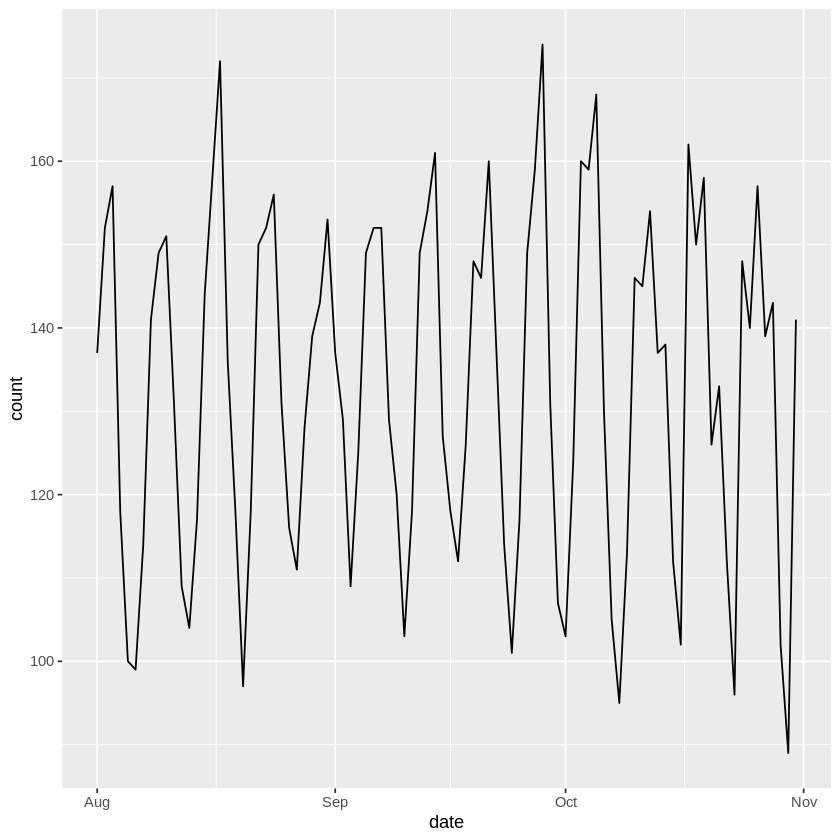

In [23]:
month_wise_txn_count= anz %>%
  group_by(date=date) %>%
  summarise(count=n())
ggplot(month_wise_txn_count,aes(x=date,y=count))+geom_line()

# A tibble: 30 × 2
   date       avg_spending
   <date>            <dbl>
 1 2018-08-20         497.
 2 2018-08-06         427.
 3 2018-08-07         312.
 4 2018-08-13         302.
 5 2018-08-27         290.
 6 2018-08-17         244.
 7 2018-08-15         243.
 8 2018-08-03         243.
 9 2018-08-31         237.
10 2018-08-23         229.
# … with 20 more rows


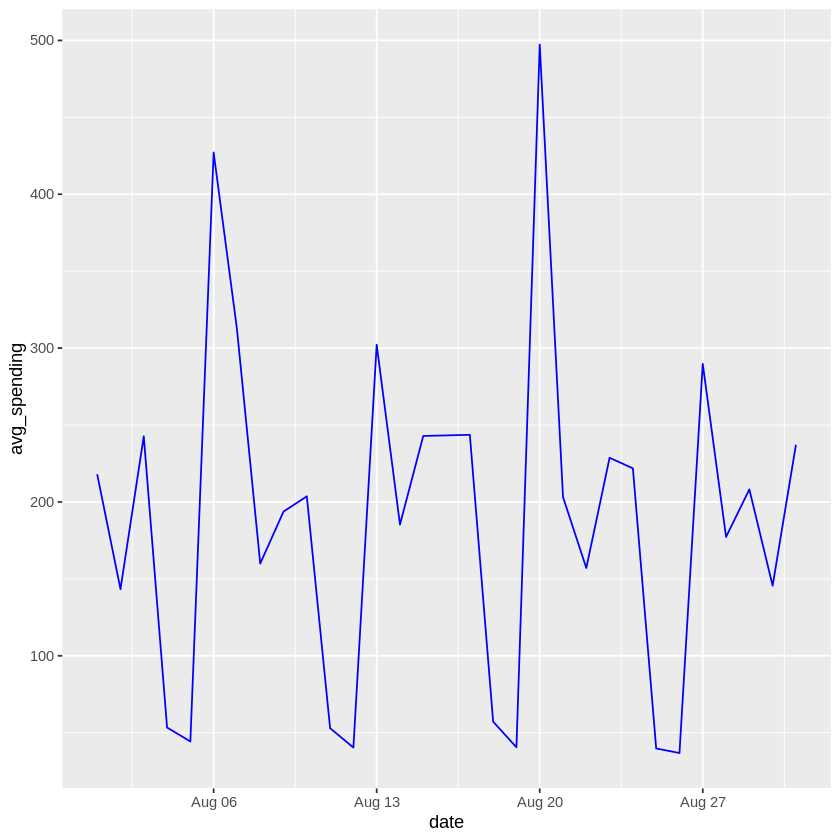

In [45]:
aug_spending= anz %>% filter(date>="2018-08-01" & date<="2018-08-31") %>%
  group_by(date) %>% summarise(avg_spending=mean(amount)) %>%
  arrange(desc(avg_spending))
  print(aug_spending)
  

ggplot(aug_spending,aes(x=date,y=avg_spending))+geom_line(col='blue')

# A tibble: 30 × 2
   date       avg_spending
   <date>            <dbl>
 1 2018-09-17         376.
 2 2018-09-03         374.
 3 2018-09-24         359.
 4 2018-09-10         325.
 5 2018-09-14         303.
 6 2018-09-26         280.
 7 2018-09-18         268.
 8 2018-09-20         262.
 9 2018-09-07         252.
10 2018-09-06         236.
# … with 20 more rows


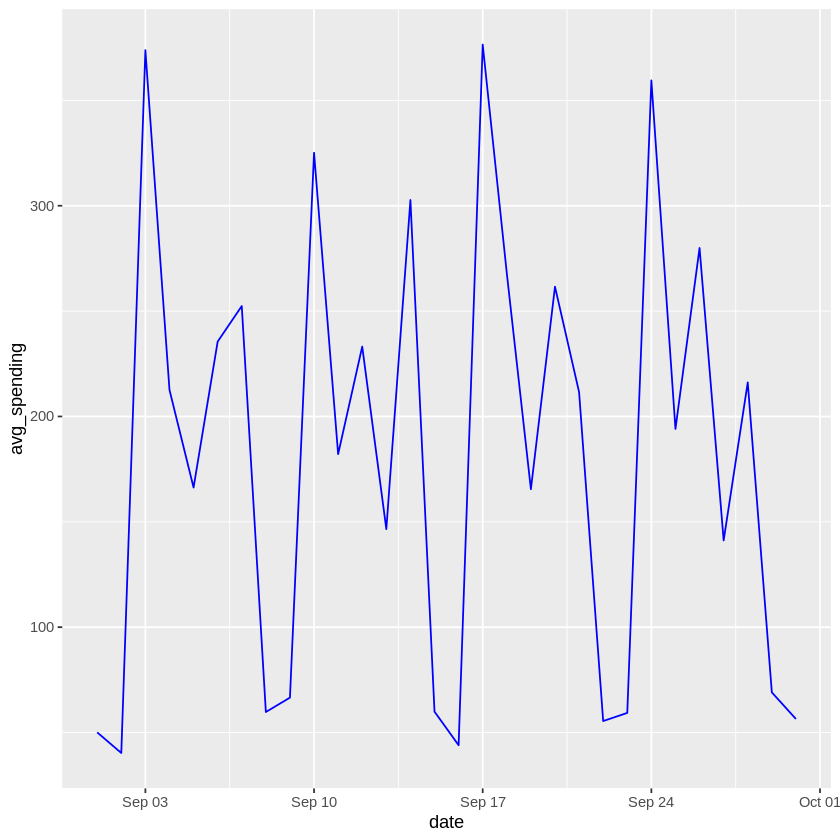

In [46]:
sep_spending= anz %>% filter(date>="2018-09-01" & date<="2018-09-30") %>%
  group_by(date) %>% summarise(avg_spending=mean(amount)) %>%
   arrange(desc(avg_spending))
  print(sep_spending)

ggplot(sep_spending,aes(x=date,y=avg_spending))+geom_line(col='blue')

**Age wise expenditure :**

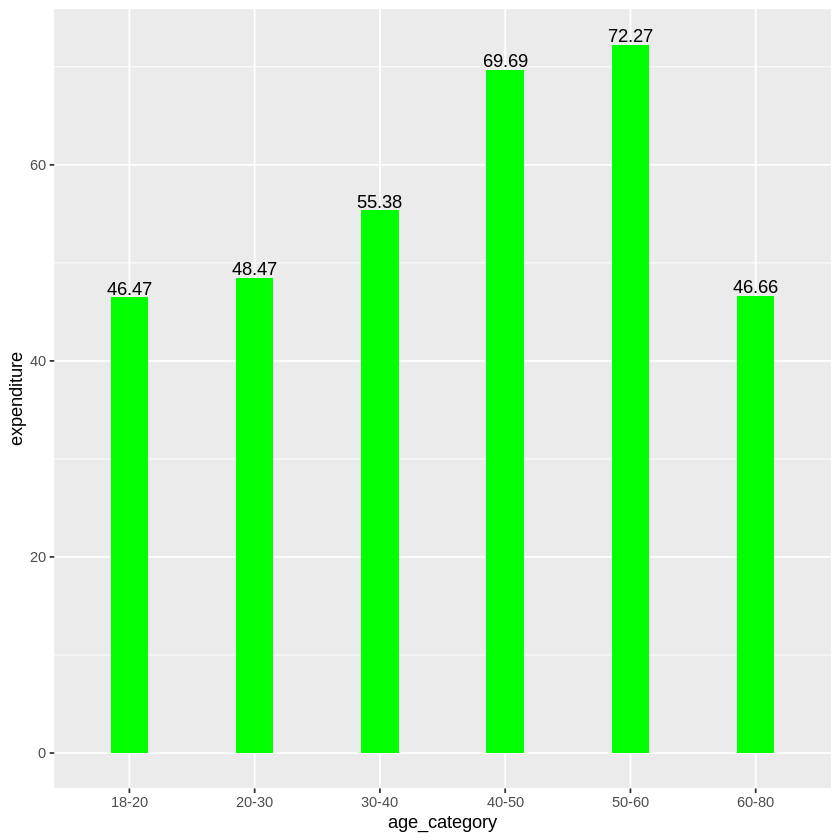

In [47]:
age_wise_expenditure = anz %>%
  filter(movement=="debit") %>%
  mutate(age_category=case_when(18<=age & age<=20~'18-20', 
                                 20<age & age<=30~'20-30',
                                 30<age & age<=40~'30-40',
                                 40<age & age<=50~'40-50',
                                 50<age & age<=60~'50-60',
                                 TRUE~'60-80')) %>%
  group_by(age_category) %>% summarise(expenditure=round(mean(amount),2))
ggplot(age_wise_expenditure,aes(x=age_category,y=expenditure))+geom_bar(fill="green",width=0.3,stat="identity")+geom_text(aes(label=expenditure),vjust=-0.2)

**Annual salary for top 10 customers**

In [30]:
annual_salary= anz %>% filter(txn_description=="PAY/SALARY") %>% 
   group_by(first_name,age,gender) %>%
   summarise(annual_sal=round(mean(amount)*12,2)) %>%
   arrange(desc(annual_sal))
   head(annual_salary,10)

`summarise()` has grouped output by 'first_name', 'age'. You can override using
the `.groups` argument.


first_name,age,gender,annual_sal
<chr>,<int>,<chr>,<dbl>
Tim,40,M,106031.76
Ronald,25,M,73286.76
Richard,24,M,72293.88
Christine,39,F,61242.12
Jacqueline,30,F,58930.80
Kimberly,27,F,58363.44
Kenneth,29,M,52863.60
Natasha,40,F,50592.48
Charles,18,M,49586.76


# **Distribution of salary agewise**

`geom_smooth()` using formula 'y ~ x'



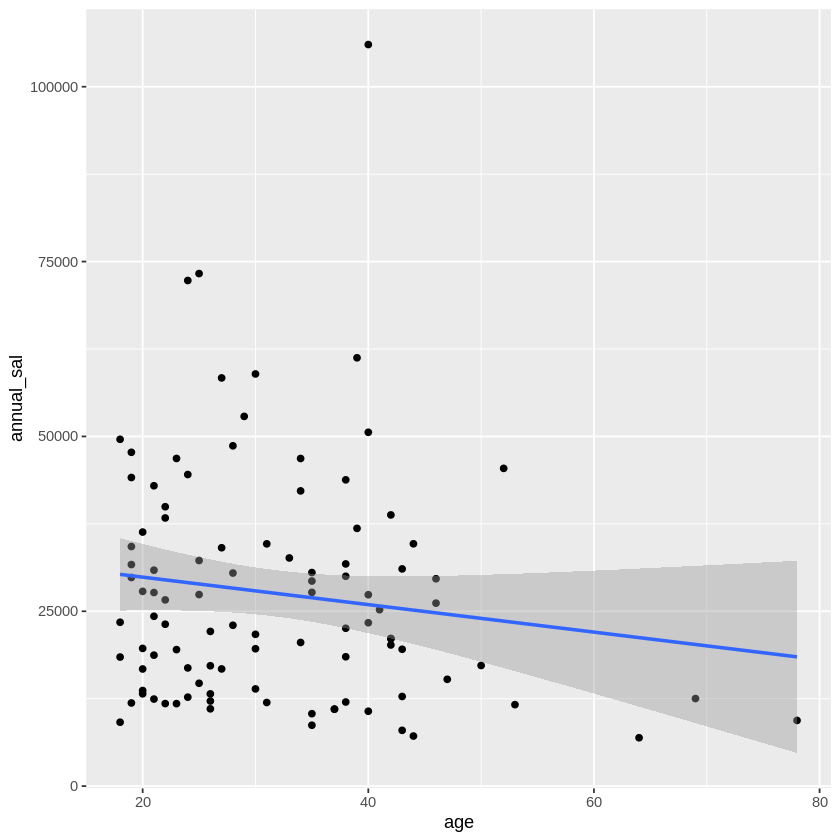

In [52]:
ggplot(annual_salary,aes(y=annual_sal,x=age))+geom_point()+geom_smooth(method="lm")

In [51]:
cor(annual_salary$annual_sal,annual_salary$age)

[1] -0.1352639

There is an negative correlation with age and salary. Because, after 60 customers are retired and there is certain decrease in salary. From the scatter plot it can be concluded there is non linear relationship between age and salary.

Salary earned by gender :

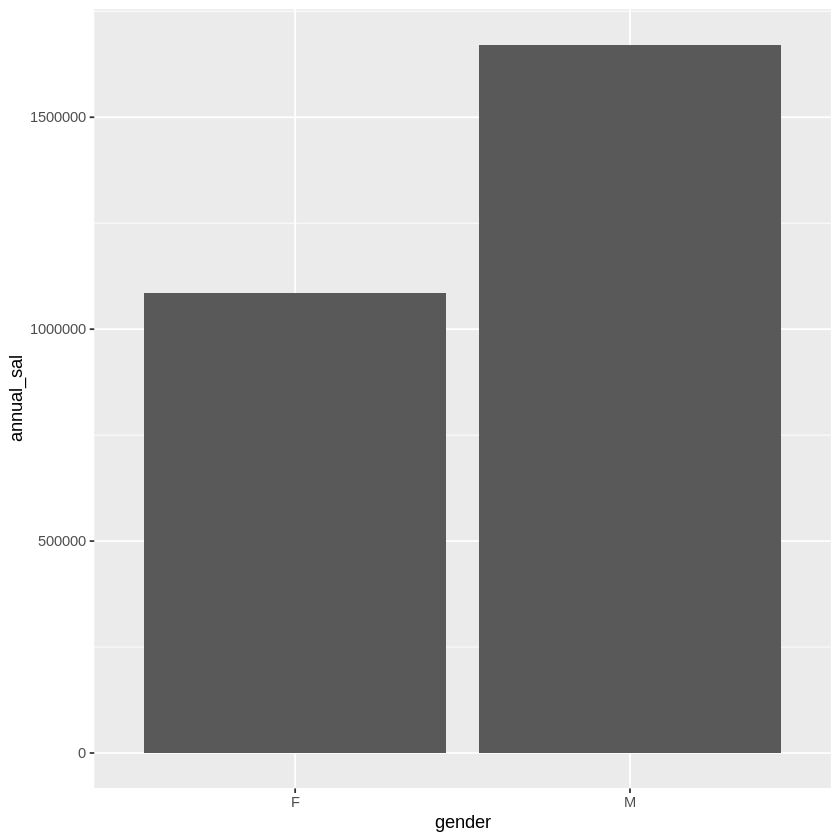

In [50]:
ggplot(annual_salary,aes(x=gender,y=annual_sal))+geom_col()

 From barplot it is clear that men's salary is higher than women